In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import dill
import matplotlib.pyplot as plt
from scripts import mapcalc_kde

In [2]:
%matplotlib inline

In [3]:
# Boundary conditions for all maps (longitudes as x vals, latitudes as y vals)
lonmin = -76.72
lonmax = -76.52
latmin = 39.19
latmax = 39.38

In [4]:
# load the dilled dataframe
map_df = dill.load(open('dills/map_df_dynamicBW.dill'))

# number of points along each map edge
# (total number of points is npts**2)
npts = np.sqrt(len(map_df))

# generate appropriate lon/lat grid
x = np.linspace(lonmin, lonmax, npts)
y = np.linspace(latmin, latmax, npts)

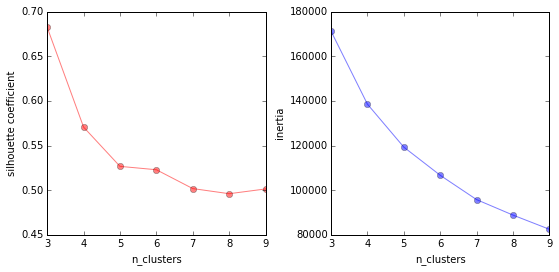

In [5]:
"""
K-means clustering.

First need to determine optimal number of clusters 
using silhouette score and inertia as metrics.

This is slow, so be careful.
"""
X = map_df
n_clusters = range(3,10)
silhouette = [0]*len(n_clusters)
inertia = [0]*len(n_clusters)

# could use GridSearchCV instead, but whatevs...
for i in range(len(n_clusters)):
    model = KMeans(n_clusters=n_clusters[i], n_init=10)
    model.fit(X)
    labels = model.predict(X)
    
    # computing the silhouette score takes time. Scale test set appropriately
    silhouette[i] = silhouette_score(X[::20], labels[::20])
    inertia[i] = model.inertia_

f, (ax1, ax2) = plt.subplots(1,2, figsize=(9,4))
f.subplots_adjust(wspace=0.3)
ax1.set_xlabel('n_clusters')
ax2.set_xlabel('n_clusters')
ax1.set_ylabel('silhouette coefficient')
ax2.set_ylabel('inertia')
ax1.plot(n_clusters, silhouette, 'o-', color='red', alpha=0.5) 
ax2.plot(n_clusters, inertia, 'o-', color='blue', alpha=0.5)

In [6]:
# 7 clusters seems most reasonable.

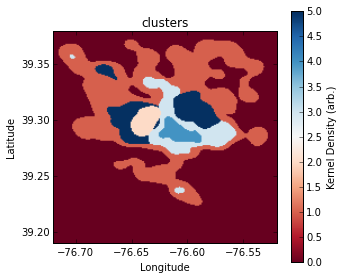

In [11]:
# compute the clusters and data labels
n_clusters = 6
model = KMeans(n_clusters=n_clusters, n_init=20)
model.fit(X)
labels = model.predict(X)

# plot the clusters
# plt.hist(labels, bins=n_clusters)
# plt.ylabel('Counts')
# plt.xlabel('Cluster number')
mapcalc_kde.plot_KDE(x, y, labels, 'clusters')

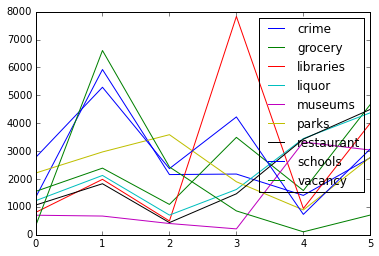

In [8]:
clusters_df = pd.DataFrame(columns=map_df.columns.values)
for i in range(1, n_clusters):
    clusters_df.loc[i-1] = map_df.iloc[np.argwhere(labels == i).flatten()].sum(axis=0).values
clusters_df.plot()